# Evaluation of prediction outcomes based on Manifold Markets


## Set up


In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) # Add parent directory to path
sys.path.insert(0, module_path)

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import brier_score_loss
import numpy as np
import manifoldpy  # https://github.com/vluzko/manifoldpy

# Local imports
from src import process
from src import plot

In [3]:
blind_mode_df, estimates_df = process.load_and_process_results()

Q_NAMES = ["Q" + str(i + 1) for i in range(50)]
# Replace column names with question names in estimates_df
estimates_df.columns = Q_NAMES
estimates_df = estimates_df / 100  # Convert to probabilities
display(estimates_df.head())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0.99,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,...,0.50,0.01,0.99,0.99,0.01,0.01,0.01,0.01,0.99,0.99
1,0.99,0.01,0.50,0.50,0.85,0.15,0.30,0.15,0.15,0.02,...,0.98,0.02,0.97,0.50,0.50,0.50,0.04,0.15,0.45,0.55
2,0.99,0.01,0.50,0.33,0.01,0.20,0.01,0.01,0.01,0.01,...,0.60,0.25,0.25,0.25,0.05,0.01,0.10,0.03,0.05,0.10
3,0.99,0.01,0.01,0.01,0.50,0.10,0.25,0.01,0.01,0.05,...,0.50,0.99,0.99,0.01,0.01,0.10,0.01,0.90,0.15,0.01
4,0.99,0.30,0.30,0.75,0.40,0.80,0.40,0.10,0.10,0.20,...,0.90,0.30,0.40,0.60,0.70,0.60,0.70,0.20,0.90,0.70


In [4]:
# Get the values from estimates_df and convert to a numpy array
estimates_matrix = process.get_estimates_matrix(blind_mode_df)
estimates_matrix.shape

(3295, 50)

In [5]:
# Get the current market probabilities from the list of slugs
current_manifold_df = process.get_current_probs()
display(current_manifold_df.head())

Loading current probabilities from file


,question_number,question,probability,resolution
0,1,1. Will Vladimir Putin be President of Russia ...,0.989370,YES
1,2,2. Will Ukraine control the city of Sevastopol...,0.018155,NO
2,3,3. Will Ukraine control the city of Luhansk at...,0.017607,NO
3,4,4. Will Ukraine control the city of Zaporizhzh...,0.978601,YES
4,5,5. Will there be a lasting cease-fire in the R...,0.014151,NO


In [6]:
resolution_vector = process.get_target_df(df_format=False)
resolution_vector, np.mean(resolution_vector)

(array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1]),
 0.34)

In [7]:
# My predictions
my_predictions_df = process.get_my_predictions()
my_predictions_df.head()

,question_number,my_prediction,probability,binary
0,1,97.0,0.97,True
1,2,8.0,0.08,False
2,3,22.0,0.22,False
3,4,86.0,0.86,True
4,5,32.0,0.32,False


## Example manifoldpy usage


In [8]:
# Get the user ID of the ACX bot based on its username
botUserName = "ACXBot"
botUserID = manifoldpy.api.get_user_by_name(username=botUserName).id
print(f"The ACX bot has user ID {botUserID}")

The ACX bot has user ID Lyt28yBamOUhbQDkzqMhNyhaeMp2


In [9]:
list_of_slugs = process.get_manifold_slugs()
display(list_of_slugs)

['1-will-vladimir-putin-be-president',
 '2-will-ukraine-control-the-city-of',
 '3-will-ukraine-control-the-city-of',
 '4-will-ukraine-control-the-city-of',
 '5-will-there-be-a-lasting-ceasefire',
 '6-will-the-kerch-bridge-be-destroye',
 '7-will-an-issue-involving-a-nuclear',
 '8-will-a-nuclear-weapon-be-detonate',
 '9-will-a-nuclear-weapon-be-used-in',
 '10-will-china-launch-a-fullscale-in',
 '11-will-any-new-country-join-nato-i',
 '12-will-ali-khameini-cease-to-be-su',
 '13-will-any-other-war-have-more-cas',
 '14-will-there-be-more-than-25-milli',
 '15-at-the-end-of-2023-will-predicti',
 '16-at-the-end-of-2023-will-predicti',
 '17-at-the-end-of-2023-will-predicti',
 '18-at-the-end-of-2023-will-predicti',
 '19-will-the-supreme-court-rule-agai',
 '20-will-there-be-any-change-in-the',
 '21-will-donald-trump-make-at-least',
 '22-will-joe-biden-have-a-positive-a',
 '23-will-donald-trump-get-indicted-o',
 '24-will-a-major-us-political-figure',
 '25-will-rishi-sunak-be-prime-minist',
 '26-wi

In [10]:
# Example question's prediction market from url slug
a_market = manifoldpy.api.get_slug(list_of_slugs[28])
display(a_market)

BinaryMarket(id='qqFkvYHzzpTuonxnBWpN', creatorUsername='ACXBot', creatorName='ACX Bot', createdTime=1671576924639, question="29. Will Twitter's average monetizable daily users be higher in 2023 than in 2022?", tags=NOTHING, url='https://manifold.markets/ACXBot/29-will-twitters-average-monetizabl', pool={'NO': 704.8458200148341, 'YES': 4734.131576320474}, volume=47628.81775153704, volume24Hours=0, outcomeType='BINARY', mechanism='cpmm-1', isResolved=True, resolutionProbability=0.16, p=0.5532685410191877, totalLiquidity=2085, closeTime=1704067199000, creatorId='Lyt28yBamOUhbQDkzqMhNyhaeMp2', lastUpdatedTime=1704356928764, creatorAvatarUrl='https://firebasestorage.googleapis.com/v0/b/mantic-markets.appspot.com/o/users%2Facx-logo.png?alt=media&token=a7041ae7-6df8-4ee4-ac3b-331db02d845f', resolution='NO', resolutionTime=1704356928219, min=None, max=None, isLogScale=None, description={'type': 'doc', 'content': [{'type': 'paragraph', 'content': [{'text': 'To resolve using https://www.statist

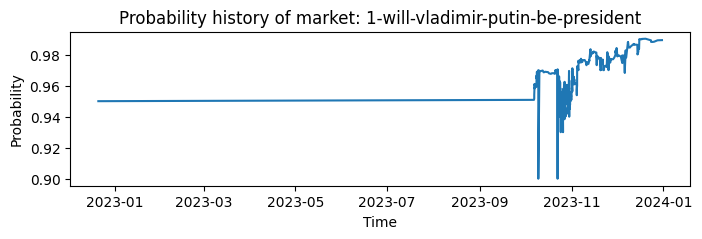

In [11]:
# Example market history
a_market_slug = list_of_slugs[0]
slug_market = manifoldpy.api.get_slug(a_market_slug)
market = manifoldpy.api.get_full_market(slug_market.id)
times, probabilities = market.probability_history()
# Convert times from unix miliseconds to datetime using a list comprehension
date_times = [datetime.datetime.fromtimestamp(time / 1000) for time in times]
plt.figure(figsize=(8, 2))
plt.plot(date_times, probabilities)
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability history of market: " + a_market_slug)
plt.show()

## Evaluate my performance


In [12]:
# Evaluate my performance
current_score = brier_score_loss(
    resolution_vector,
    my_predictions_df["probability"],
)
max_possible_score = brier_score_loss(
    my_predictions_df["binary"], my_predictions_df["probability"]
)
min_possible_score = brier_score_loss(
    ~my_predictions_df["binary"], my_predictions_df["probability"]
)

print(
    "Brier score of my predictions relative to the current probability:", current_score
)
print("Best possible brier score of my predictions:", max_possible_score)
print("Worst possible brier score of my predictions:", min_possible_score)

Brier score of my predictions relative to the current probability: 0.153088
Best possible brier score of my predictions: 0.07388800000000001
Worst possible brier score of my predictions: 0.609088


## Evaluating Blind Mode participants performance


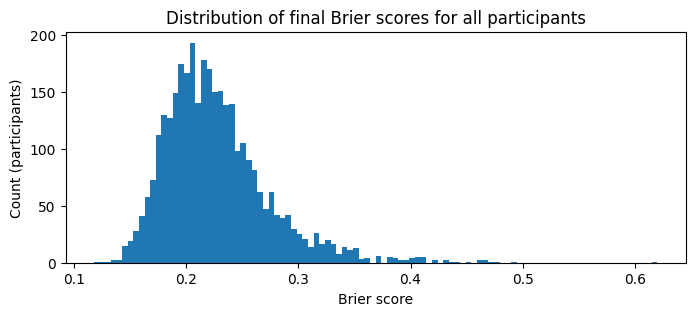

Top 10 Blind Mode scores: [0.117964 0.123976 0.131042 0.133492 0.136784 0.140788 0.141976 0.143756
 0.14466  0.14466 ]
My rank would be 41 out of 3295
My percentile: 0.012443095599393019


In [13]:
# Use estimates_df and current_manifold_df["probability"].values to calculate the brier score of each question

blind_mode_final_brier = np.mean(
    np.square(estimates_matrix - resolution_vector), axis=1
)

# Histogram of blind_mode_final_brier
plt.figure(figsize=(8, 3))
plt.hist(blind_mode_final_brier, bins=100)
plt.xlabel("Brier score")
plt.ylabel("Count (participants)")
plt.title("Distribution of final Brier scores for all participants")
plt.show()

# Top 10 scores
blind_mode_final_brier_sorted = blind_mode_final_brier.copy()
blind_mode_final_brier_sorted.sort()

print(f"Top 10 Blind Mode scores: {blind_mode_final_brier_sorted[:10]}")

# My ranking and percentile
my_rank = np.searchsorted(blind_mode_final_brier_sorted, current_score)
my_percentile = my_rank / len(blind_mode_final_brier_sorted)
print(f"My rank would be {my_rank} out of {len(blind_mode_final_brier_sorted)}")
print(f"My percentile: {my_percentile}")

In [14]:
# What is the median superforcaster percentile?

# copy blind_mode_df and add a column for the final brier score
tmp_df = blind_mode_df.copy()
tmp_df["final_brier"] = blind_mode_final_brier

# Find the median score out of the rows where Superforecaster is "Yes"
median_sf_score = np.median(tmp_df[tmp_df["Superforecaster"] == "Yes"]["final_brier"])

# Find the percentile of the median score
median_sf_percentile = np.searchsorted(
    blind_mode_final_brier_sorted, median_sf_score
) / len(blind_mode_final_brier_sorted)

print(f"The median superforecaster's score is {median_sf_score:.4}")
print(f"The median superforecaster's score percentile is {median_sf_percentile:.4%}")
print(f"Meaning their ranking percentile is {1-median_sf_percentile:.4%}")

The median superforecaster's score is 0.2065
The median superforecaster's score percentile is 37.1472%
Meaning their ranking percentile is 62.8528%


In [15]:
# Are there prticipants with identical brier scores?

# Get the counts of all unique values in the brier_score array
unique, counts = np.unique(blind_mode_final_brier, return_counts=True)

# Calculate and print x out of y participants with duplicate brier scores
print(
    f"{sum(counts[counts>1])} out of {len(blind_mode_final_brier)} participants have duplicate brier scores"
)

# Sort by counts, then print the values and counts with counts>1
sorted_counts = sorted(zip(counts, unique), reverse=True)
sorted_counts = [x for x in sorted_counts if x[0] > 1]
print("All duplicate brier scores:")
sorted_counts

73 out of 3295 participants have duplicate brier scores
All duplicate brier scores:


[(3, 0.1654565),
 (2, 0.37249999999999994),
 (2, 0.29069799999999996),
 (2, 0.289364),
 (2, 0.27925),
 (2, 0.2559),
 (2, 0.254186),
 (2, 0.25272599999999995),
 (2, 0.25065000000000004),
 (2, 0.2473),
 (2, 0.24634999999999999),
 (2, 0.24280200000000002),
 (2, 0.23190400000000003),
 (2, 0.23105),
 (2, 0.226374),
 (2, 0.22355400000000003),
 (2, 0.222348),
 (2, 0.22020000000000003),
 (2, 0.219986),
 (2, 0.21599999999999997),
 (2, 0.21475000000000002),
 (2, 0.21415599999999999),
 (2, 0.20795000000000002),
 (2, 0.20669399999999996),
 (2, 0.2064),
 (2, 0.20445),
 (2, 0.20370800000000003),
 (2, 0.20339999999999991),
 (2, 0.19974999999999998),
 (2, 0.19823800000000003),
 (2, 0.194762),
 (2, 0.191556),
 (2, 0.18046000000000004),
 (2, 0.17945),
 (2, 0.173182),
 (2, 0.15245)]

All vs. ForecastingExperience: Ttest_indResult(statistic=7.451655693327102, pvalue=1.110313906308108e-13)
All vs. Superforecaster: Ttest_indResult(statistic=1.1281756568666919, pvalue=0.2593265559323057)
All vs. LessWrong: Ttest_indResult(statistic=3.754150443550716, pvalue=0.00017640847180316343)


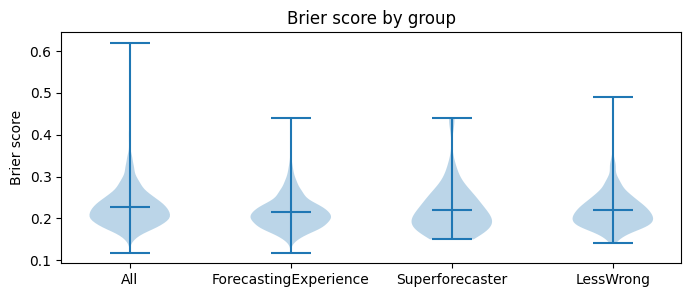

In [16]:
# Evaluate performance split by group

fig = plot.group_final_brier_violin_plot(
    blind_mode_df, blind_mode_final_brier, print_stats=True
)
plt.show()

## Time series analysis from market histories


In [17]:
# Get the market histories of the markets from the list of slugs
market_hist_df = process.get_all_markets()
display(market_hist_df.head())

Loading market histories from file


,time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,1671576908087,0.95,0.5,0.5,0.5,0.260575,0.2,0.5,0.2,0.5,...,0.696664,0.5,0.5,0.33,0.5,0.5,0.290097,0.500000,0.500000,0.500000
1,1671576908977,0.95,0.5,0.5,0.5,0.260575,0.2,0.5,0.2,0.5,...,0.696664,0.5,0.5,0.33,0.5,0.5,0.290097,0.500000,0.500000,0.500183
2,1671576909909,0.95,0.5,0.5,0.5,0.260575,0.2,0.5,0.2,0.5,...,0.696664,0.5,0.5,0.33,0.5,0.5,0.290097,0.500000,0.499807,0.500374
3,1671576910833,0.95,0.5,0.5,0.5,0.260575,0.2,0.5,0.2,0.5,...,0.696664,0.5,0.5,0.33,0.5,0.5,0.290097,0.499939,0.499616,0.500563
4,1671576911689,0.95,0.5,0.5,0.5,0.260575,0.2,0.5,0.2,0.5,...,0.696664,0.5,0.5,0.33,0.5,0.5,0.290097,0.499883,0.499439,0.500739


Prediction for Q3 is 0.22


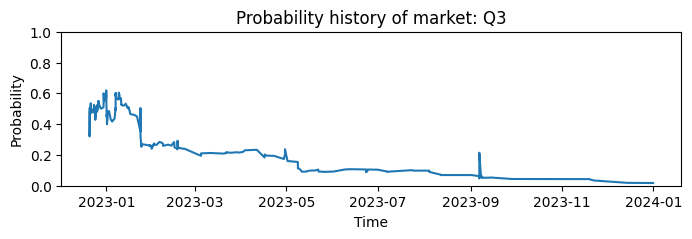

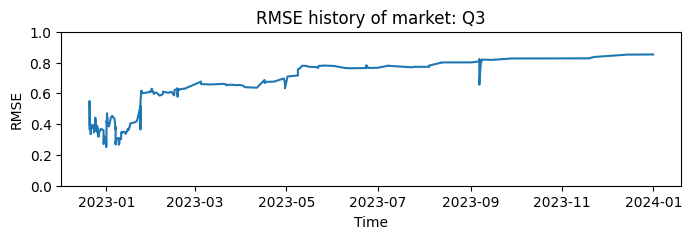

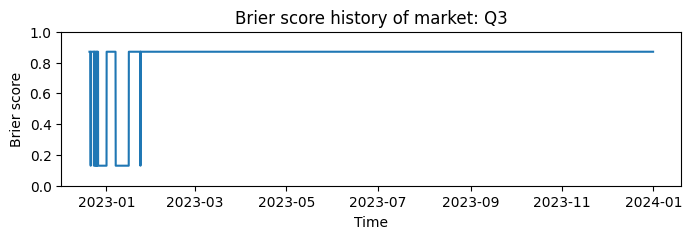

In [18]:
# Plot example questions across time from market_hist_df
q_to_plot = 3
# Use my prediction as the default
q_to_plot_prediction = my_predictions_df[
    my_predictions_df["question_number"] == q_to_plot
]["probability"].values[0]
# q_to_plot_prediction = 0.55
print(f"Prediction for Q{q_to_plot} is {q_to_plot_prediction}")

q_to_plot_prediction = 87
fig_1, fig_2, fig_3 = plot.question_market_time_series(
    q_to_plot, q_to_plot_prediction / 100, market_hist_df
)
plt.show()

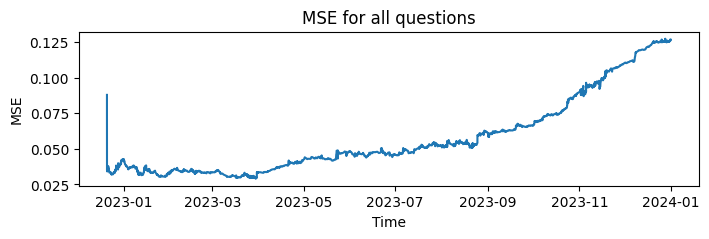

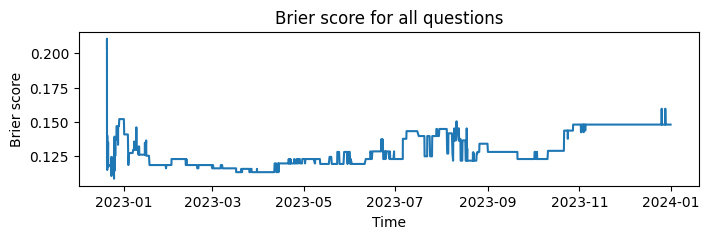

In [19]:
# Calculate the MSE of my predictions relative to the market histories

# TODO: temp, need to adapt later functions to take the output of process.get_my_predictions()
my_pred_df = pd.DataFrame(columns=["Q" + str(i) for i in range(1, 51)])
my_pred_df.loc[0] = my_predictions_df["probability"].values

fig_1, fig_2 = plot.my_score_time_series(my_pred_df, market_hist_df)
plt.show()

## Evaluate Blind Mode participants' performance


In [20]:
# For the predictions of each blind-mode participant in estimates_df, calculate their mean
# Brier score for each market across time

# Calculate Brier score
score_type = "brier"
blind_mode_brier_df = process.get_score_df(
    estimates_df, market_hist_df, score_type=score_type
)
print("Blind Mode participants Brier score across time:")
display(blind_mode_brier_df.head())

# Calculate MSE
score_type = "mse"
blind_mode_mse_df = process.get_score_df(
    estimates_df, market_hist_df, score_type=score_type
)
print("Blind Mode participants MSE across time:")
display(blind_mode_mse_df.head())

Blind Mode participants Brier score across time:


,time,0,1,2,3,4,5,6,7,8,...,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294
0,1671576908087,0.375694,0.298324,0.199006,0.300796,0.260784,0.24128,0.20231,0.273062,0.265384,...,0.323469,0.250353,NaN,0.301487,NaN,0.303779,NaN,0.300583,0.342722,0.338135
1,1671576916367,0.395294,0.315524,0.244606,0.316796,0.256784,0.26528,0.22511,0.285402,0.272584,...,0.294898,0.266680,NaN,0.253745,NaN,0.303779,NaN,0.309278,0.325330,0.332012
2,1671576923969,0.375694,0.297524,0.244606,0.307196,0.246784,0.26328,0.22311,0.301572,0.274584,...,0.290816,0.262598,NaN,0.223423,NaN,0.332350,NaN,0.302322,0.281852,0.325073
3,1671576933362,0.434494,0.268324,0.225006,0.259596,0.237184,0.24728,0.19791,0.288806,0.264584,...,0.278571,0.238108,NaN,0.240842,NaN,0.282350,NaN,0.285800,0.316635,0.325890
4,1671576940797,0.434494,0.249924,0.185806,0.265596,0.217184,0.25728,0.19191,0.263274,0.274184,...,0.262245,0.203822,NaN,0.192455,NaN,0.282350,NaN,0.291887,0.325330,0.360176


Blind Mode participants MSE across time:


,time,0,1,2,3,4,5,6,7,8,...,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294
0,1671576908087,0.263449,0.118944,0.128924,0.156468,0.086709,0.172201,0.127196,0.154727,0.087118,...,0.104528,0.120836,NaN,0.168696,NaN,0.130510,NaN,0.056937,0.083785,0.111967
1,1671576916367,0.263448,0.118950,0.128915,0.156464,0.086725,0.172190,0.127178,0.154698,0.087115,...,0.104492,0.120805,NaN,0.168564,NaN,0.130510,NaN,0.056944,0.083693,0.111996
2,1671576923969,0.263499,0.119014,0.128920,0.156375,0.086762,0.172214,0.127105,0.154711,0.087097,...,0.104401,0.120716,NaN,0.168421,NaN,0.130517,NaN,0.056964,0.083568,0.112048
3,1671576933362,0.263738,0.119017,0.128999,0.156321,0.086725,0.172269,0.127009,0.154752,0.087209,...,0.104282,0.120664,NaN,0.168223,NaN,0.130718,NaN,0.057107,0.083277,0.112164
4,1671576940797,0.263541,0.118724,0.128588,0.156250,0.086421,0.172218,0.126741,0.154571,0.087172,...,0.103991,0.120249,NaN,0.167494,NaN,0.130696,NaN,0.057056,0.083079,0.112477


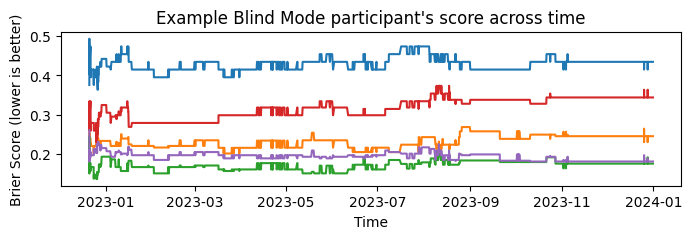

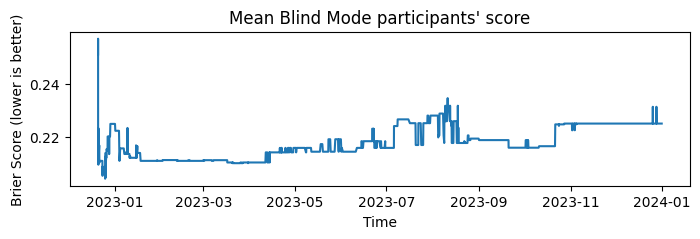

In [21]:
# Plot a few example participants Brier score across time
transient = 0
plt.figure(figsize=(8, 2))
for i in range(5):
    plt.plot(
        [
            datetime.datetime.fromtimestamp(time / 1000)
            for time in blind_mode_brier_df["time"]
        ][transient:],
        blind_mode_brier_df[i][transient:],
    )
plt.xlabel("Time")
plt.ylabel("Brier Score (lower is better)")
plt.title("Example Blind Mode participant's score across time")
plt.show()

# Plot mean blind-mode participants mean Brier score across time
# Make sure to exclude the transient and the "time" column
plt.figure(figsize=(8, 2))
plt.plot(
    [
        datetime.datetime.fromtimestamp(time / 1000)
        for time in blind_mode_brier_df["time"]
    ][transient:],
    blind_mode_brier_df.loc[:, blind_mode_brier_df.columns != "time"][transient:].mean(
        axis=1
    ),
)
plt.xlabel("Time")
plt.ylabel("Brier Score (lower is better)")
plt.title("Mean Blind Mode participants' score")
plt.show()

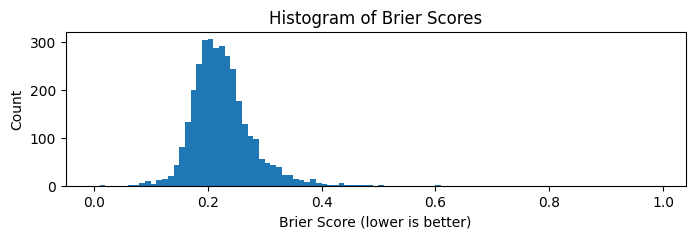

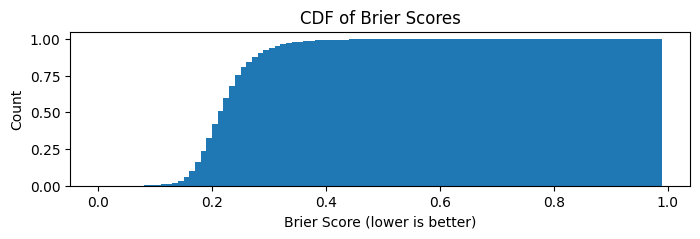

In [22]:
# Final Brier scores
hist_bin_width = 0.01

# Histogram
plt.figure(figsize=(8, 2))
plt.hist(blind_mode_brier_df.iloc[-1], bins=np.arange(0, 1, hist_bin_width))
plt.xlabel("Brier Score (lower is better)")
plt.ylabel("Count")
plt.title("Histogram of Brier Scores")
plt.show()

# Plot cdf of the histogram
plt.figure(figsize=(8, 2))
plt.hist(
    blind_mode_brier_df.iloc[-1],
    bins=np.arange(0, 1, hist_bin_width),
    cumulative=True,
    density=True,
)
plt.xlabel("Brier Score (lower is better)")
plt.ylabel("Count")
plt.title("CDF of Brier Scores")
plt.show()

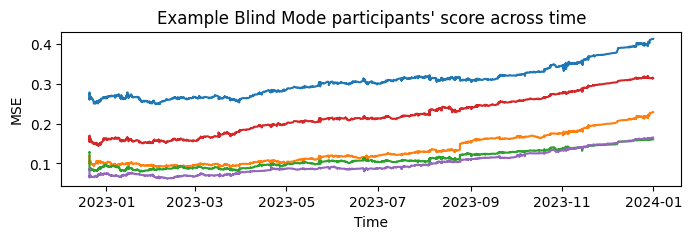

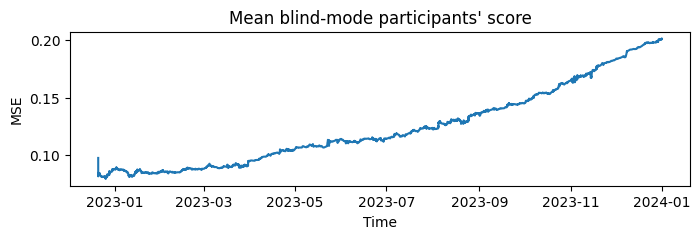

In [23]:
transient = 0
time_vec = [
    datetime.datetime.fromtimestamp(time / 1000) for time in blind_mode_mse_df["time"]
]
# Plot a few example participants mse across time
plt.figure(figsize=(8, 2))
for i in range(5):
    plt.plot(
        time_vec[transient:],
        blind_mode_mse_df[i][transient:],
    )
plt.xlabel("Time")
plt.ylabel("MSE")
plt.title("Example Blind Mode participants' score across time")
plt.show()

# Plot mean blind-mode participants mse across time
plt.figure(figsize=(8, 2))
plt.plot(
    time_vec[transient:],
    blind_mode_mse_df.loc[:, blind_mode_mse_df.columns != "time"][transient:].mean(
        axis=1
    ),
)
plt.xlabel("Time")
plt.ylabel("MSE")
plt.title("Mean blind-mode participants' score")
plt.show()

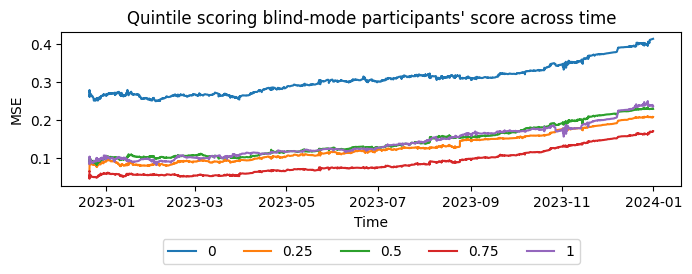

In [24]:
# For the final time point of blind_mode_mse_df, get the index of the participant at each
# quintile (lowest, 25%, median, 75%, highest)
# Then, plot the market history of each of these participants

transient = 0

# Calculate the quantiles of the final values and store them and their indices
sorted_final_values = np.sort(blind_mode_mse_df.iloc[-1])
num_non_nans = np.count_nonzero(~np.isnan(sorted_final_values))
quantiles = [0, 0.25, 0.5, 0.75, 1]
quantile_indices = [int(num_non_nans * i) for i in quantiles]
# quantile_indices[-1] += - 1

quantile_values = sorted_final_values[quantile_indices]
# Sort quantile_indices and quantile_values by quantile_values
quantile_indices, quantile_values = zip(*sorted(zip(quantile_indices, quantile_values)))

time_vec = [
    datetime.datetime.fromtimestamp(time / 1000) for time in blind_mode_mse_df["time"]
]

# Plot a few example participants mse across time
plt.figure(figsize=(8, 2))
for ithParticipant in range(len(quantile_indices)):
    plt.plot(
        time_vec[transient:],
        blind_mode_mse_df[quantile_indices[ithParticipant]][transient:],
        label=str(quantiles[ithParticipant]),
    )
plt.xlabel("Time")
plt.ylabel("MSE")
plt.title("Quintile scoring blind-mode participants' score across time")
# plt.legend(loc='upper right')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3), ncol=5)
plt.show()

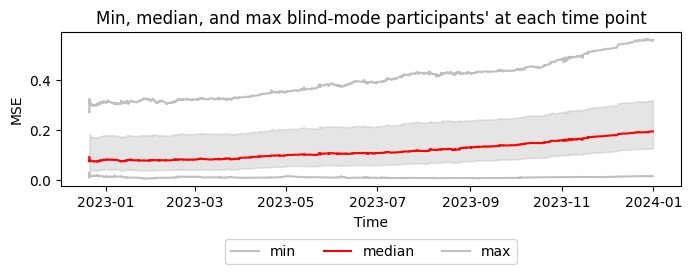

In [25]:
# Across each time point of blind_mode_mse_df, plot the min, median, and max of the
# participants' scores
# Add shaded region for the 25th to 75th percentile

transient = 0

time_vec = [
    datetime.datetime.fromtimestamp(time / 1000) for time in blind_mode_mse_df["time"]
]

min_mse = blind_mode_mse_df.loc[:, blind_mode_mse_df.columns != "time"].min(axis=1)
median_mse = blind_mode_mse_df.loc[:, blind_mode_mse_df.columns != "time"].median(
    axis=1
)
max_mse = blind_mode_mse_df.loc[:, blind_mode_mse_df.columns != "time"].max(axis=1)

mse_lower = blind_mode_mse_df.loc[:, blind_mode_mse_df.columns != "time"].quantile(
    0.025, axis=1
)
mse_upper = blind_mode_mse_df.loc[:, blind_mode_mse_df.columns != "time"].quantile(
    0.975, axis=1
)

plt.figure(figsize=(8, 2))
plt.plot(
    time_vec[transient:], min_mse[transient:], label="min", color="grey", alpha=0.5
)
plt.plot(time_vec[transient:], median_mse[transient:], label="median", color="red")
plt.plot(
    time_vec[transient:], max_mse[transient:], label="max", color="grey", alpha=0.5
)
plt.fill_between(
    time_vec[transient:],
    mse_lower[transient:],
    mse_upper[transient:],
    alpha=0.2,
    color="grey",
)
plt.xlabel("Time")
plt.ylabel("MSE")
plt.title("Min, median, and max blind-mode participants' at each time point")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3), ncol=5)
plt.show()